In [1]:
import pandas as pd
df = pd.read_csv('Real_Combine_1.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,0.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,0.0,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,0.0,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,0.0,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,0.0,46.0,6.9,3.3,5.4,223.208333


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [7]:
regressor.score(X_train,y_train)

0.9131695126973484

In [8]:
regressor.score(X_test,y_test)

0.4017145299083984

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)
score.mean()

0.3144602041108441

In [10]:
prediction = regressor.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

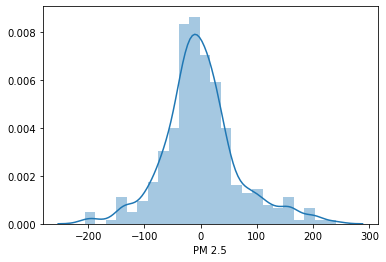

In [11]:
import seaborn as sns
sns.distplot(y_test-prediction)

#### Now cehcking the R^2 score with hyper parameter tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [18]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]

In [17]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [19]:
rf = RandomForestRegressor()

In [25]:
rf_random = RandomizedSearchCV(rf,random_grid,scoring = 'neg_mean_squared_error',n_jobs = -1,n_iter = 100,cv = 5,verbose = 3,random_state=42)

In [26]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [27]:
rf_random.best_score_

-3504.772648440217

In [28]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [29]:
prediction = rf_random.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

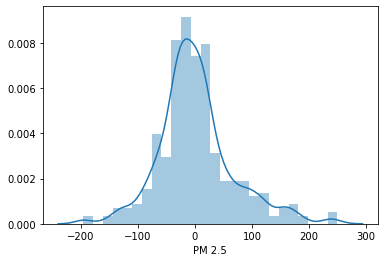

In [30]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [31]:
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test,prediction))
print(metrics.mean_squared_error(y_test,prediction))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

48.050764617701304
4429.211473419774
66.55232132254872


In [33]:
import pickle
file = open('Random_Forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)